<a href="https://colab.research.google.com/github/Shk-aftab/AI/blob/master/Income_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_income=pd.read_csv('/content/drive/My Drive/data set/income.csv')

In [12]:
data_income.head(2)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"


In [0]:
data=data_income.copy()

In [14]:
data.head(2)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"


In [15]:
data.info()
#We can see all the datatypes of columns are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [18]:
data.isnull().sum()
#Cheking whether there is missing values

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [20]:
#lets understand the data through descriptive statistics for which we will be using descrbe() function
summary_num=data.describe()
summary_num

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [22]:
# now we will look into categorical variables
summary_cate=data.describe(include='O')
summary_cate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [23]:
#frequency of each categories
data['JobType'].value_counts()


 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [24]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [0]:
#There is a unique value '?' in these two columns instead of nan lets deal with it
#go back and read the data by including 'na_values['?']' to our dataframe

In [0]:
data=pd.read_csv('/content/drive/My Drive/data set/income.csv',na_values=[" ?"])

In [0]:
#Data pre-processing

In [38]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [0]:
#as you can the missing values

In [0]:
data2=data.dropna(axis=0)

In [40]:
data2.shape

(30162, 13)

In [0]:
#we have gotten rid of 1816 rows wherever there were missing values

In [43]:
#Relationship between independent variables
correlation=data2.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [0]:
#as you can see none of varables are co related to each other lets check the categorical variable

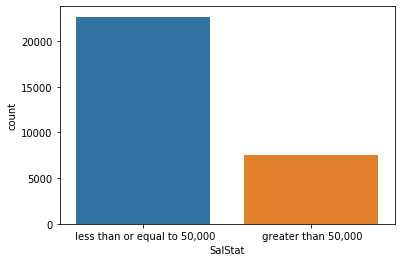

In [46]:
#frequency distribution of salary status
Salstat=sns.countplot(data2['SalStat'])

In [0]:
# 75% of people's salary status is <=50,000
# and 25% of people's salary status is >50,000

**Logistic Regression**

In [48]:
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0, 'greater than 50,000':1})
data2['SalStat']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        0.0
1        0.0
2        NaN
3        0.0
4        0.0
        ... 
31973    0.0
31974    0.0
31975    0.0
31976    0.0
31977    0.0
Name: SalStat, Length: 30162, dtype: float64

In [50]:
new_data=pd.get_dummies(data2,drop_first=True)
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,EdType_ 9th,EdType_ Assoc-acdm,EdType_ Assoc-voc,EdType_ Bachelors,EdType_ Doctorate,EdType_ HS-grad,EdType_ Masters,EdType_ Preschool,EdType_ Prof-school,EdType_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,...,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
#storing the column names
columns_list=list(new_data.columns)

In [53]:
#separating the input names from the data
features=list(set(columns_list)-set(['SalStat']))
features

['relationship_ Unmarried',
 'nativecountry_ Peru',
 'nativecountry_ South',
 'EdType_ Bachelors',
 'EdType_ Masters',
 'occupation_ Priv-house-serv',
 'nativecountry_ Greece',
 'nativecountry_ France',
 'nativecountry_ Portugal',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'EdType_ 12th',
 'capitalloss',
 'JobType_ Without-pay',
 'maritalstatus_ Married-civ-spouse',
 'nativecountry_ Jamaica',
 'hoursperweek',
 'race_ Black',
 'EdType_ Assoc-acdm',
 'nativecountry_ Mexico',
 'occupation_ Prof-specialty',
 'nativecountry_ Ecuador',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'occupation_ Armed-Forces',
 'nativecountry_ Yugoslavia',
 'EdType_ Preschool',
 'EdType_ HS-grad',
 'EdType_ 7th-8th',
 'occupation_ Other-service',
 'occupation_ Farming-fishing',
 'maritalstatus_ Widowed',
 'JobType_ State-gov',
 'nativecountry_ Vietnam',
 'nativecountry_ India',
 'nativecountry_ Germany',
 'nativecountry_ Laos',
 'maritalstatus_ Never-married',
 'nativecountry_ Thailand',
 

In [0]:
#storing the output values in y
y=new_data['SalStat'].values

In [0]:
#storing the values from input features
x=new_data[features].values

In [0]:
#splitting the data into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [0]:
logistic=LogisticRegression()